# Modèle de Lokta-Volterra

## Imports

In [42]:
import math
import autograd
import autograd.numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#from precedent_projet import level_curve_question_8

## Question 1 :

L'évolution du nombre de proies dans le temps dépend du taux de reproduction de chaque proie, qu'on suppose linéaire (on suppose qu'il y a beaucoup de prédateurs et de proies, donc qu'on peut, en moyennant, avoir des approximations valables), ainsi que du taux de disparition des proies à cause des prédateurs, ce qui explique les coefficients $\alpha$ et $\beta$.

D'une manière similaire, l'évolution du nombre de prédateur dépend de leur taux de mortalité, qui dépend lui-même du nombre de proies accessibles aux prédateurs (ces derniers meurent d'autant plus qu'il y a peu de proies à se mettre sous la dent), ce qui explique, toujours en utilisant l'approximation du paragraphe précédent, les coefficients $\gamma$ et $\delta$.

On pose $f : \mathbb{R}^2 \longrightarrow \mathbb{R}^2$ telle que $f(x_1,x_2)=(f_1(x_1,x_2),f_2(x_1,x_2))$ avec 

$f_1(x_1,x_2)=x_1(\alpha - \beta x_2)$

$f_2(x_1,x_2)=-x_2(\gamma - \delta x_1)$

En posant $X=(x_1,x_2)$, on a $\dot{X}=f(X)$

Cherchons les points d'équilibre, donc les points tels que $f(X)=0$

Le point $(0,0)$ respecte cette condition donc est bien un point d'équilibre. Après calculs, on trouve un autre point d'équilibre : $\bar{x}=(\frac{\alpha}{\beta}, \frac{\gamma}{\delta})$

Pour ce qui est de la stabilité, on calcule la matrice Jacobienne de $f$ : $^tJ_f(x_1,x_2)=\begin{pmatrix} \alpha - \beta x_2 & \delta x_2 \\ -\beta x_1 & \delta x_1 -\gamma \end{pmatrix}$

On a donc $J_f(0,0)=\begin{pmatrix} \alpha & 0 \\ 0 & -\gamma \end{pmatrix}$. Ses valeurs propres sont $\alpha$ et $-\gamma$, et la partie réelle de $\alpha$ est strictement positive puisque $\alpha$ est un paramèyre strictement positif. Le point $(0,0)$ est donc un point d'équilibre instable

D'autre part, $^tJ_f(\bar{x})=\begin{pmatrix} \alpha - \frac{\beta \gamma}{\delta} & \gamma \\ -\alpha & \frac{\delta \alpha}{\beta}-\gamma \end{pmatrix}$

On calcule ensuite le polynôme caractéristique de $J_f(\bar{x})$ pour en déduire les valeurs propres, qui en sont les racines. En posant $a=\beta \gamma - \alpha \delta$, on a $P(x)=x^2 + a\frac{\beta + \delta}{\beta\delta}x + (\frac{a^2}{\delta\beta} + \alpha\gamma)$

Après calcul du déterminant, on remarque que le signe des parties réelles des valeurs propres de cette matrice dépendent de la valeur des coefficients $\alpha, \beta, \gamma, \delta$. On ne peut donc pas conclure sur la stabilité de $\bar{x}$ à ce stade.

## Question 2 :

Après des essais non concluants, nous avons cherché des valeurs cohérentes de $\alpha, \beta, \gamma, \delta$ sur internet et avons trouvé les valeurs utilisées dans le programme ci-dessous :

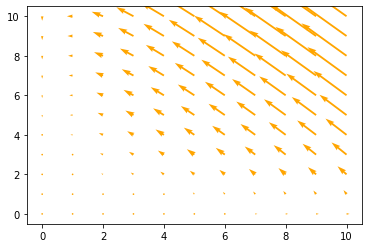

In [43]:
# définition des constantes
alpha, beta, gamma, delta = 2/3, 4/3, 1, 1

def f(x):
    x1, x2 = x
    return np.array([x1*(alpha - beta*x2), -x2*(gamma - delta*x1)])

def fv2(x): # x est un tuple
    x1, x2 = x
    return x1*(alpha - beta*x2), -x2*(gamma - delta*x1)

def affiche_champ_de_vecteur(limite = 10, couleur = "orange"):

    x = np.linspace(0,limite,limite + 1)
    y = np.linspace(0, limite,limite + 1)


    X, Y = np.meshgrid(x, y)
    Z = f((X, Y))

    plt.quiver(X, Y, Z[0], Z[1], color = couleur)
    plt.show()
    
    
affiche_champ_de_vecteur()

On utilise la fonction streamplot pour visualiser le portrait de phase, avec différents codes pour marquer les gradients de plus en plus élevés

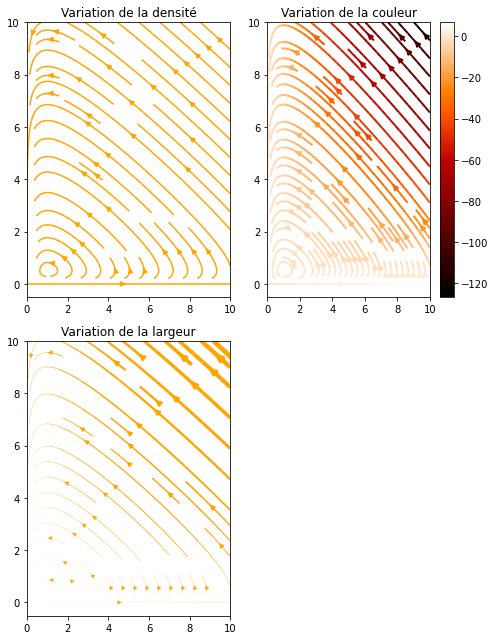

In [44]:
def affiche_portrait_de_phase(limite = 10):

    x = np.linspace(0,limite,limite + 1)
    y = np.linspace(0, limite,limite + 1)

    X, Y = np.meshgrid(x, y)
    Z = f((X, Y))

    U, V = Z[0], Z[1]
    vitesse = np.sqrt(U**2 + V**2)

    
    fig = plt.figure(figsize=(7, 9))
    gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[1, 1])

    #  changer la densité le long d'une ligne de champ
    ax0 = fig.add_subplot(gs[0, 0])
    ax0.streamplot(X, Y, U, V, density=[0.5, 1], color = "orange")
    ax0.set_title('Variation de la densité')

    # changer la couleur le long d'une ligne
    ax1 = fig.add_subplot(gs[0, 1])
    strm = ax1.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='gist_heat')
    fig.colorbar(strm.lines)
    ax1.set_title('Variation de la couleur')

    #  changer la largeur le long d'une ligne
    ax2 = fig.add_subplot(gs[1, 0])
    lw = 5*vitesse / vitesse.max()
    ax2.streamplot(X, Y, U, V, density=0.6, color='orange', linewidth=lw)
    ax2.set_title('Variation de la largeur')

    plt.tight_layout()
    plt.show()

affiche_portrait_de_phase()

## Question 3 : 

Notons $E=\mathbb{R}_{>0}$ x $\mathbb{R}_{>0}$ et $X_0 \in E$. 

On va raisonner par l'absurde en supposant qu'une solution initialisée dans $E$ en sort à un instant $t_0$ donné. Prenons par exemple à cet instant-là $x_1=0$, avec d'autres conditions initiales que l'on fixe aléatoirement (à la seule contrainte près que $x_2(t_0)=-\gamma x_2$). Par le théorème de Cauchy-Lipschitz, il y a alors une unique solution au problème posé. Comme la solution comprenant $x_1=0  \forall t$ est solution de ce problème de Cauchy, par unicité, on a $x_1=0 \forall t$. On n'a donc en fait pas débuté dans $E$ et on obtient une contradiction. Ainsi, toute solution initialisée dans $E$ reste dans $E$ sur son ensemble de définition.

## Question 4 : 

Soit $H(x_1,x_2)=\delta x_1 - \gamma ln(x_1) + \beta x_2 -\alpha ln(x_2)$. On calcule :

$\dot{H}=\delta \dot{x_1}-\gamma \frac{\dot{x_1}}{x_1} + \beta \dot{x_2}-\alpha \frac{\dot{x_2}}{x_2}$.

En remplaçant $\dot{x_1}$ et $\dot{x_2}$ par leurs valeurs, on obtient $\dot{H}=0$

## Question 5 : 

On utilise le code déjà utilisé dans le premier projet numérique pour tracer les courbes de niveau : 

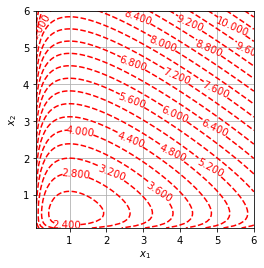

In [45]:
def H(X):
    x, y = X
    return delta*x - gamma*np.log(x) + beta*y - alpha*np.log(y)

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f((X, Y))
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="red", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")
    
display_contour(
H,
x=np.linspace(0.1,6,100),
y=np.linspace(0.1,6,100),
levels=25)

On observe comme prévu deux points d'équilibre. Celui en $(0,0)$ est bien graphiquement instable. Par contre, $\bar{x}$ correspond graphiquement à un point d'équilibre stable car c'est un minimum global de $H$ sur $E$.On remarque par ailleurs graphiquement que pour une solution initialisée dans $E$, sachant que $\dot H = 0$ (donc qu'on reste sur une ligne de niveau), la solution reste dans $\mathbb{R}$. Cela finit de répondre à la question.

## Question 6

La fonction voulue s'écrit comme suit : 

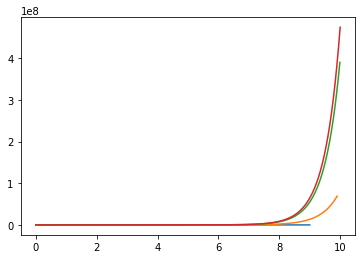

In [46]:
def solve_euler_explicit(f, x0, dt, t0, tf):
    # on a x_(n+1) = x_n + dt*f(x_n)

    n = int((tf - t0)/dt)
    
    temps=[t0+i*dt for i in range(n)]
    res = np.empty(n, dtype = tuple)
    #exact=np.empty(n, dtype = tuple) #on met aussi la solution exacte pour la fin de la question

    res[0] = x0
    # exact[0] = x0

    for i in range(1, n):
        res[i] = res[i-1] + dt*f(res[i - 1])
        #exact[i]=x0*np.exp(2*temps[i])

    return temps, res



def f1(x):
    return 2*x
for i in range (4):
    tab=solve_euler_explicit(f1,1,10**(-i), 0, 10)
    plt.plot(tab[0], tab[1])

#plt.plot(tab[0], tab[2], color='red')


On teste la fonction sur l'équation $\dot{x}=2x$ dont la solution exacte est $x_0exp(2t)$. Pour tester la convergence lorsque dt tend vers 0, on trace les solutions pour différentes valeurs du pas, de plus en plus petites, ainsi que la solution exacte, et on vérifie que la solution approchée tend bien vers la solution exacte. C'est le cas.

## Question 7

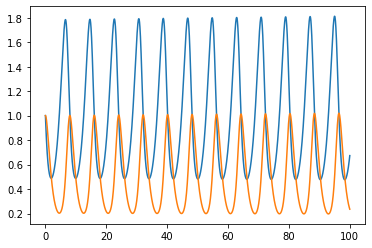

In [57]:
#on définit la fonction Euler explicit en 2D

def solve_euler_explicit_2D(f,x0,dt,t0,tf):
    
    n = int((tf - t0)/dt)
    temps=[t0+i*dt for i in range(n)]
    
    X1=np.empty(n)
    X2=np.empty(n)
    Hliste=np.empty(n)
    
    X1[0], X2[0] = x0[0], x0[1]
    Hliste[0] = H((x0[0], x0[1]))
    
    for i in range (1,n):
        X1[i] = X1[i-1] + dt*f((X1[i-1], X2[i-1]))[0]
        X2[i] = X2[i-1] + dt*f((X1[i-1],X2[i-1]))[1]
        Hliste[i] = H((X1[i],X2[i]))
        
        
    return temps, X1, X2, Hliste

# on définit la condition initiale*
x0 = (1,1)


# tf = 100

temps, X1, X2, Hliste= solve_euler_explicit_2D(fv2, x0, 0.001, 0, 100)


#plt.plot(temps, np.vectorize(H)(res))

plt.plot(temps, X1)
plt.plot(temps, X2)






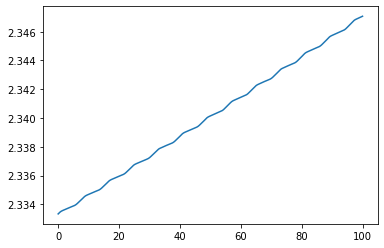

In [58]:
plt.plot(temps, Hliste)

On constate que, sur le temps long, $H$ n'est pas indépendante du temps : or elle est censée l'être le long des solutions de Lotka-Volterra : le schéma explicite n'est donc pas satisfaisant sur des temps longs et *a fortiori* pas fidèle à la réalité.

## Question 8

In [ ]:
# méthode de Newton
# récupérée du précédent projet

def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f


def Newton(F, X0, eps=0.001, N=1000): 
    x0, y0 = X0
    for i in range(N):
        A = J(F)(x0, y0)
        B = F(x0, y0)
        X = np.linalg.solve(A, B)
        x, y = x0 - X[0], y0 - X[1]
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return (x, y)
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")
        
def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):
    # on a x_(n+1) = x_n + dt*f(x_n+1)

    n = int((tf - t0)/dt)
    
    temps=[t0+i*dt for i in range(n)]
    res = np.empty(n, dtype = tuple)

    res[0] = x0

    for i in range(1, n):
        def F(x):
            return x-dt*f(x)-res[i-1]
        res[i] = Newton(F, res[i-1], N=itermax)

    return temps, res

In [ ]:
# on définit la condition initiale*
x0 = (5,21)


# tf = 100

temps, res = solve_euler_implicit(f, x0, 0.001, 0, 100)

plt.plot(temps, np.vectorize(H)(res))




## Question 8bis

Supposons qu'on dispose d'une solution aux équations de Lokta-Volterra. Alors on a vu en question 3 que $\dot H = 0$, donc que $H$ est constante, égale à sa valeur initiale $H_0 = H(x(0))$. Pour tout choix de $u$, les deuxièmes termes des 2 équations proposées sont donc nuls et on retrouve les équations du début. Les solutions de ce système sont donc identiques aux solutions de Lokta-Volterra.

## Question 9

$H_0$ est constante donc $\frac{d}{dt}(H(x(t))-H_0) = \dot H$.
Après calculs et simplifications, 
$\dot H = (H-H_0)(-\delta u_1 + \gamma \frac{u_1}{x_1} -\beta x_2 + \gamma \frac{u_2}{x_2})$, expression licite car on a vu en question 3 que si on commençait dans $E$, on y restait, donc que $x_1 \ne 0$ et $x_2 \ne 0$

On veut donc écrire $k ||\nabla H(x(t))||^2 = \delta u_1 - \gamma \frac{u_1}{x_1} +\beta x_2 - \gamma \frac{u_2}{x_2}$. Pour tout $x \ne \bar x$, $\nabla (H(x(t)) \ne 0$. On écrit donc 

$k = \frac{\delta u_1 - \gamma \frac{u_1}{x_1} +\beta x_2 - \gamma \frac{u_2}{x_2}}{||\nabla H(x(t))||^2}$

et on veut que $k$ soit une constante. 

Posons $f : t \longrightarrow k = \frac{\delta u_1 - \gamma \frac{u_1}{x_1} +\beta x_2 - \gamma \frac{u_2}{x_2}}{||\nabla H(x(t))||^2}$ $f$ est continue par quotient de fonctions continues